<a href="https://colab.research.google.com/github/irisawa/TF2.0-Alpha/blob/master/overfitting_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore overfitting and underfitting

In [1]:
from __future__ import absolute_import, division, print_function

!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


# IMDBデータセットのロード

`multi_hot_sequences`関数を作成し1-hotエンコーディングを行う。

In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


In [4]:
train_data.shape

(25000, 10000)

代表で１つをグラフ化する。

データはソートされているため、インデックスが１に近い方にデータが固まっている。

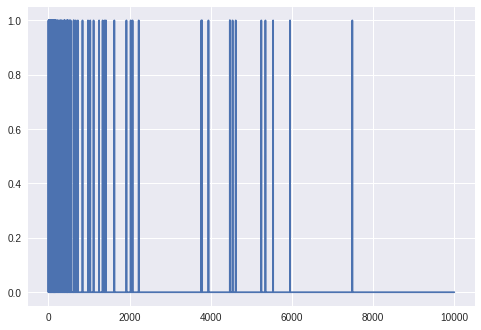

In [5]:
plt.plot(train_data[0])

# ベースラインのモデルを作成する

In [6]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.4752 - accuracy: 0.8128 - binary_crossentropy: 0.4752 - val_loss: 0.3194 - val_accuracy: 0.8784 - val_binary_crossentropy: 0.3194
Epoch 2/20
25000/25000 - 4s - loss: 0.2353 - accuracy: 0.9156 - binary_crossentropy: 0.2353 - val_loss: 0.2829 - val_accuracy: 0.8878 - val_binary_crossentropy: 0.2829
Epoch 3/20
25000/25000 - 4s - loss: 0.1702 - accuracy: 0.9408 - binary_crossentropy: 0.1702 - val_loss: 0.2990 - val_accuracy: 0.8826 - val_binary_crossentropy: 0.2990
Epoch 4/20
25000/25000 - 4s - loss: 0.1367 - accuracy: 0.9533 - binary_crossentropy: 0.1367 - val_loss: 0.3502 - val_accuracy: 0.8678 - val_binary_crossentropy: 0.3502
Epoch 5/20
25000/25000 - 4s - loss: 0.1099 - accuracy: 0.9646 - binary_crossentropy: 0.1099 - val_loss: 0.3561 - val_accuracy: 0.8714 - val_binary_crossentropy: 0.3561
Epoch 6/20
25000/25000 - 4s - loss: 0.0871 - accuracy: 0.9741 - binary_crossentropy: 0.0871 - val_loss: 0.3908

比較対象として隠れ層が少ないモデルを作成する。




In [8]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6105 - accuracy: 0.7460 - binary_crossentropy: 0.6105 - val_loss: 0.5167 - val_accuracy: 0.8315 - val_binary_crossentropy: 0.5167
Epoch 2/20
25000/25000 - 4s - loss: 0.4174 - accuracy: 0.8832 - binary_crossentropy: 0.4174 - val_loss: 0.3807 - val_accuracy: 0.8759 - val_binary_crossentropy: 0.3807
Epoch 3/20
25000/25000 - 3s - loss: 0.3025 - accuracy: 0.9091 - binary_crossentropy: 0.3025 - val_loss: 0.3223 - val_accuracy: 0.8812 - val_binary_crossentropy: 0.3223
Epoch 4/20
25000/25000 - 3s - loss: 0.2426 - accuracy: 0.9222 - binary_crossentropy: 0.2426 - val_loss: 0.2950 - val_accuracy: 0.8868 - val_binary_crossentropy: 0.2950
Epoch 5/20
25000/25000 - 3s - loss: 0.2057 - accuracy: 0.9337 - binary_crossentropy: 0.2057 - val_loss: 0.2846 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.2846
Epoch 6/20
25000/25000 - 3s - loss: 0.1808 - accuracy: 0.9406 - binary_crossentropy: 0.1808 - val_loss: 0.2825

大きいモデルも作成する。

In [10]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [11]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 16s - loss: 0.3388 - accuracy: 0.8556 - binary_crossentropy: 0.3388 - val_loss: 0.2985 - val_accuracy: 0.8781 - val_binary_crossentropy: 0.2985
Epoch 2/20
25000/25000 - 17s - loss: 0.1398 - accuracy: 0.9500 - binary_crossentropy: 0.1398 - val_loss: 0.3350 - val_accuracy: 0.8719 - val_binary_crossentropy: 0.3350
Epoch 3/20
25000/25000 - 17s - loss: 0.0425 - accuracy: 0.9878 - binary_crossentropy: 0.0425 - val_loss: 0.4642 - val_accuracy: 0.8676 - val_binary_crossentropy: 0.4642
Epoch 4/20
25000/25000 - 17s - loss: 0.0060 - accuracy: 0.9991 - binary_crossentropy: 0.0060 - val_loss: 0.6125 - val_accuracy: 0.8674 - val_binary_crossentropy: 0.6125
Epoch 5/20
25000/25000 - 17s - loss: 0.0010 - accuracy: 1.0000 - binary_crossentropy: 0.0010 - val_loss: 0.7281 - val_accuracy: 0.8664 - val_binary_crossentropy: 0.7281
Epoch 6/20
25000/25000 - 17s - loss: 8.2008e-04 - accuracy: 1.0000 - binary_crossentropy: 8.2008e-04 - va

# トレーニングと検証の損失をプロットする

実線はトレーニング損失を示し、破線は検証損失を示す。


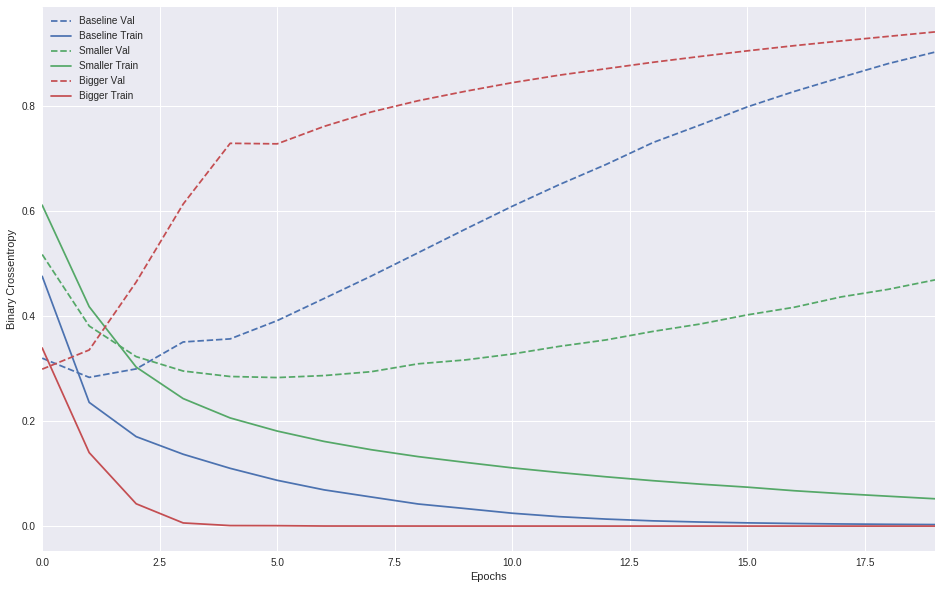

In [12]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

1つのエポックの後、大規模ネットワークがほぼすぐに過剰適合し始め、さらに厳しく過剰適合する。ネットワークの容量が大きいほど、トレーニングデータのモデル化は速くなりますが（トレーニング損失が少なくなる）、過剰適合の影響を受けやすくなる（トレーニング損失と検証損失の差が大きくなる）。

# 過剰適合を防ぐための戦略


## 正則化
機械学習では、学習データへの予測に対する何らかの誤差を定式化して、これを最小化するように重み付けを最適化するという問題を解く。しかし、ただ単に誤差関数の値を最小化しようと学習させると、過学習が起こりやすくなってしまう。そこで、パラメータの値の大きさに対して何らかのペナルティを科すことで、過学習を抑えた「ちょうど良い」パラメータを学習させる方法がある。これを正則化と呼ぶ。

抽象的には、これはオッカムの剃刀の原理として説明できる。オッカムの剃刀とは、何かの現象に対する複数の説明があるとするなら、最も前提や仮定の少ないシンプルな説明が正しい可能性が高いという原理である。
機械学習においても同様に、同じ予測ができるモデルならば、シンプルであるほうが汎化性能が高い、と考えられる。

kerasでも以下の2つの正規化が使用できる。

- L1正則化 ペナルティとして学習モデルのパラメータの絶対値の総和を用いる
- L2正則化 ペナルティとして学習モデルのパラメータの二乗の総和を用いる

なお、L1正則化はLASSO正則化、L2正則化はRidge正則化、L1とL2両方を使う場合をElasticNetと呼ぶ場合がある。下記はl2正則化を使う例。

In [13]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5227 - accuracy: 0.8011 - binary_crossentropy: 0.4813 - val_loss: 0.3728 - val_accuracy: 0.8789 - val_binary_crossentropy: 0.3280
Epoch 2/20
25000/25000 - 4s - loss: 0.3001 - accuracy: 0.9089 - binary_crossentropy: 0.2503 - val_loss: 0.3366 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.2835
Epoch 3/20
25000/25000 - 4s - loss: 0.2493 - accuracy: 0.9308 - binary_crossentropy: 0.1937 - val_loss: 0.3434 - val_accuracy: 0.8844 - val_binary_crossentropy: 0.2862
Epoch 4/20
25000/25000 - 4s - loss: 0.2287 - accuracy: 0.9402 - binary_crossentropy: 0.1697 - val_loss: 0.3646 - val_accuracy: 0.8777 - val_binary_crossentropy: 0.3044
Epoch 5/20
25000/25000 - 4s - loss: 0.2131 - accuracy: 0.9485 - binary_crossentropy: 0.1519 - val_loss: 0.3744 - val_accuracy: 0.8765 - val_binary_crossentropy: 0.3123
Epoch 6/20
25000/25000 - 4s - loss: 0.2015 - accuracy: 0.9539 - binary_crossentropy: 0.1385 - val_loss: 0.3885


l2（0.001）は、レイヤーのウェイトマトリックス内のすべての係数が、ネットワークの総損失に`0.001 * weight_coefficient_value ** 2`を追加することを意味する。このペナルティはトレーニング時にのみ追加されるため、このネットワークの損失はテスト時よりもトレーニング時の方がはるかに大きくなる。

これがL2正則化ペナルティの影響。

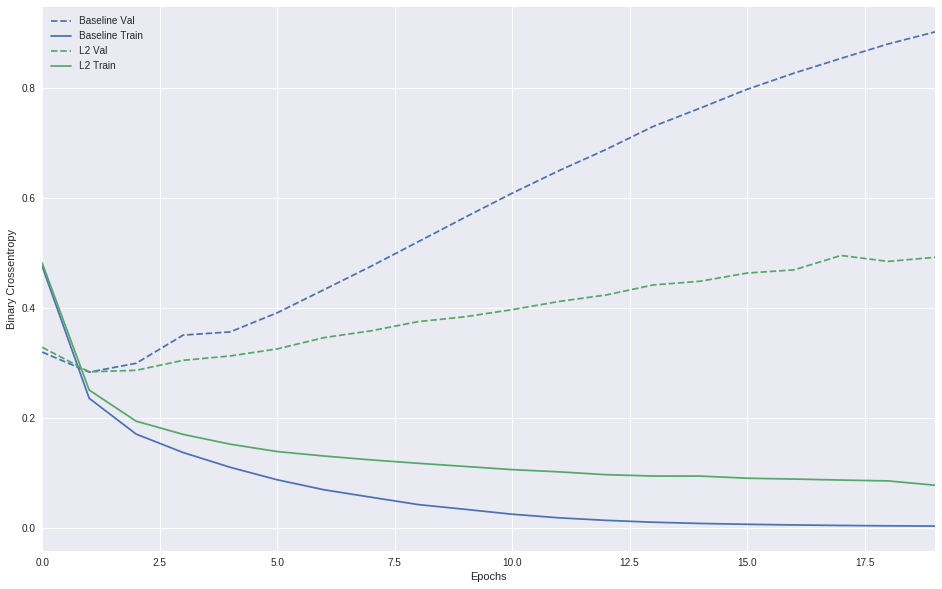

In [14]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

L2正規化モデルは、ベースラインモデルよりもオーバーフィットに対する耐性がはるかに高い。

# ドロップアウト

ドロップアウトは、ニューラルネットに対して最も有効であり、最も広く使われる正則化手法で、ニューラルネットの「ゴッドファーザー」トロント大学のジェフ・ヒントン教授とその教え子によって開発された。ドロップアウトはどのような手法かというと、モデルの訓練時に一定の割合のノードの出力をゼロにする (値をドロップアウトする) というもの。この手法により、過学習を緩和して、汎化性能を向上させることができる。

ヒントン先生がドロップアウトの手法を考案したきっかけについて、本書では本人が語った面白いエピソードが紹介されている。

「私は銀行へ行った。窓口の行員は交代し続けており、私は彼らに何故なのかと聞いた。行員は、自分には分からないと言ったが、彼らはたくさん動き回っていた。私は、窓口係の交代で従業員同士の協力が必要となることによって、銀行詐欺を防げるからに違いないと考えた。」

窓口での顧客対応を、わざわざ複数人で行うのは一見非効率だと思える。しかし、あえて情報共有を必要とする状況を作ると、その過程で意味のない情報は捨てられることになる。そうすることで本質的な情報に対する注意が向けられ、銀行詐欺のような異常事態に気付くことができるのではないか、と言うことなのだろう。

ニューラルネットに対するドロップアウトがうまく働く理由も、これと似ていると言われている。訓練データの偏りによって生じた意味のないパターン (ヒントンが共謀(conspiracies)と呼ぶもの) は、わざとランダムなノイズを入れることでかき消すことができる。そのため、訓練データに含まれる本当に重要な意味のある情報のみが残される。


Kerasでドロップアウトを使う場合には、モデルにドロップアウト用のレイヤーを追加するという形を取る。

> dropout_model.add(layers.Dropout(0.5))


IMDBネットワークに2つのドロップアウトレイヤーを追加して、オーバーフィットを減らすのにどれだけ効果があるかを確認してみる。

In [15]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6323 - accuracy: 0.6407 - binary_crossentropy: 0.6323 - val_loss: 0.5039 - val_accuracy: 0.8494 - val_binary_crossentropy: 0.5039
Epoch 2/20
25000/25000 - 4s - loss: 0.4708 - accuracy: 0.8007 - binary_crossentropy: 0.4708 - val_loss: 0.3529 - val_accuracy: 0.8794 - val_binary_crossentropy: 0.3529
Epoch 3/20
25000/25000 - 4s - loss: 0.3609 - accuracy: 0.8638 - binary_crossentropy: 0.3609 - val_loss: 0.2988 - val_accuracy: 0.8846 - val_binary_crossentropy: 0.2988
Epoch 4/20
25000/25000 - 4s - loss: 0.2961 - accuracy: 0.8957 - binary_crossentropy: 0.2961 - val_loss: 0.2781 - val_accuracy: 0.8863 - val_binary_crossentropy: 0.2781
Epoch 5/20
25000/25000 - 4s - loss: 0.2456 - accuracy: 0.9171 - binary_crossentropy: 0.2456 - val_loss: 0.2782 - val_accuracy: 0.8881 - val_binary_crossentropy: 0.2782
Epoch 6/20
25000/25000 - 4s - loss: 0.2177 - accuracy: 0.9263 - binary_crossentropy: 0.2177 - val_loss: 0.2871

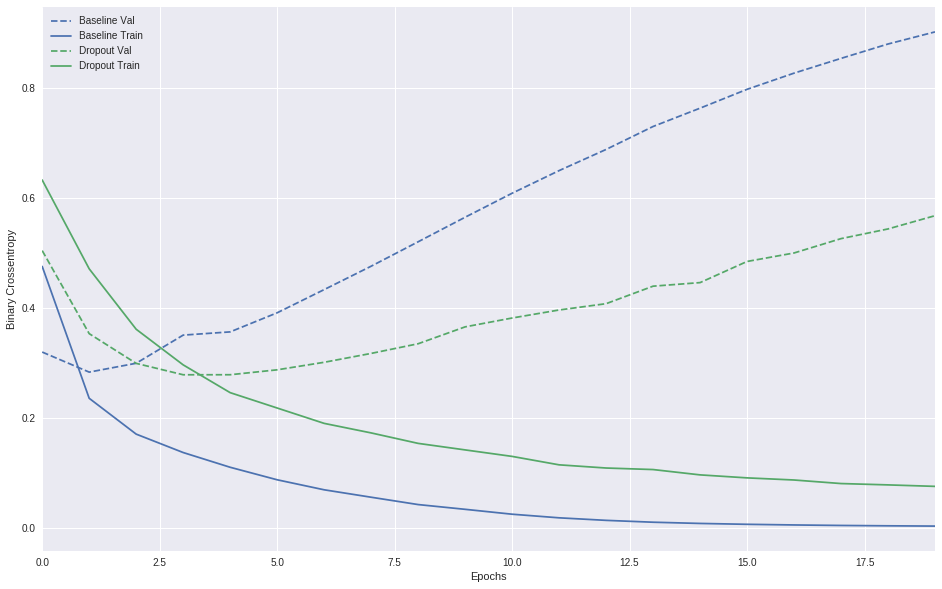

In [16]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

ドロップアウトを追加することは、ベースラインモデルに対する明らかな改善となる。

# まとめ
ニューラルネットワークにおける過剰適合を防ぐための最も一般的な方法は次のとおり。

- より多くのトレーニングデータを入手。
- ネットワークの容量を減らす。
- 正則化を追加。
- ドロップアウトを追加。

これ以外にもいろいろある。
（data-augmentation、batch normalizationなど）